In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Preprocessing

In [2]:
coral_data = pd.read_csv('deep_sea_corals_data.csv')

/Users/kyle/.conda/envs/notebooks/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,10,11,12,15,16,20,21,22,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
coral_data.iloc[0]

ShallowFlag                            NaN
DatasetID                              NaN
CatalogNumber                          NaN
SampleID                               NaN
Repository                             NaN
ScientificName                         NaN
VernacularNameCategory                 NaN
TaxonRank                              NaN
IdentificationQualifier                NaN
Locality                               NaN
latitude                     degrees_north
longitude                     degrees_east
DepthInMeters                            m
DepthMethod                            NaN
ObservationDate                        NaN
SurveyID                               NaN
Station                                NaN
EventID                                NaN
SamplingEquipment                      NaN
LocationAccuracy                         m
Temperature                degrees_Celsius
Salinity                               PSU
Oxygen                                mg/L
pH         

In [4]:
coral_data = coral_data.drop(axis=0, index=0)

#### Overview of coral data

In [5]:
coral_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762132 entries, 1 to 762132
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ShallowFlag              762132 non-null  float64
 1   DatasetID                762132 non-null  object 
 2   CatalogNumber            762132 non-null  float64
 3   SampleID                 618498 non-null  object 
 4   Repository               755149 non-null  object 
 5   ScientificName           762132 non-null  object 
 6   VernacularNameCategory   762132 non-null  object 
 7   TaxonRank                762132 non-null  object 
 8   IdentificationQualifier  745630 non-null  object 
 9   Locality                 640014 non-null  object 
 10  latitude                 762132 non-null  object 
 11  longitude                762132 non-null  object 
 12  DepthInMeters            762132 non-null  object 
 13  DepthMethod              761850 non-null  object 
 14  Obse

In [6]:
def clean_date(date):

    """ Used to clean the date of the coral """
    if isinstance(date, float):
        # date is 'nan'
        return date

    date = date.split('-')

    try:
        if len(date) == 1:
            year = int(date[0])
            month = 1
            day = 1
        elif len(date) == 2:
            year = int(date[0])
            month = int(date[1])
            day = 1
        else:
            year = int(date[0])
            month = int(date[1])
            day = int(date[2])

        return datetime(year=year, month=month, day=day)
    except Exception:
        return float('nan')
coral_data['ObservationDate'] = coral_data['ObservationDate'].map(lambda x: clean_date((x)))

In [7]:
coral_data['ObservationDate']

1        1964-04-14
2        1964-04-14
3        1958-03-24
4        1963-06-21
5        1964-07-27
            ...    
762128   2018-09-11
762129   2013-05-01
762130   2010-04-14
762131   1899-01-01
762132   1899-06-08
Name: ObservationDate, Length: 762132, dtype: datetime64[ns]

<ipython-input-8-f9a8c159ed94>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


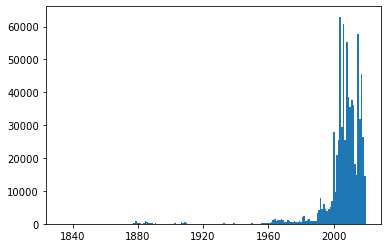

In [8]:
fig, ax = plt.subplots()
n_years = coral_data['ObservationDate'].max().year - coral_data['ObservationDate'].min().year
ax.hist(
    coral_data['ObservationDate'],
    bins=n_years
)
fig.show()

In [9]:
def clean_geopoints(point):
    try:
        return float(point)
    except Exception:
        return float('nan')
coral_data['longitude'] = coral_data['longitude'].map(lambda x: clean_geopoints(x))
coral_data['latitude'] = coral_data['latitude'].map(lambda x: clean_geopoints(x))

In [10]:
def clean_temperature(temp):
    temp = float(temp)
    if temp == -999.0:
        return float('nan')
    return temp
coral_data['Temperature'] = coral_data['Temperature'].map(lambda x: clean_temperature(x))

all datapoints

<ipython-input-11-7ae8e166d286>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


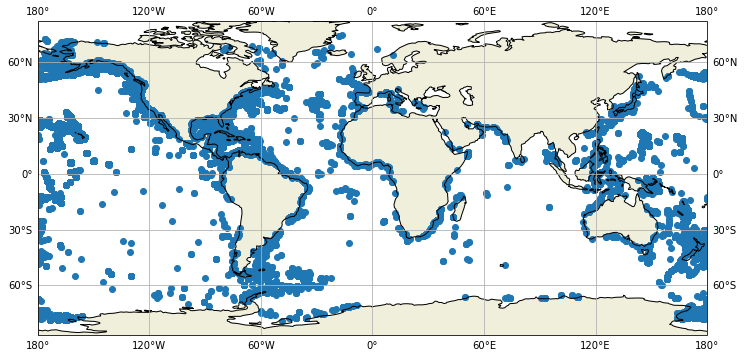

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.gridlines(draw_labels=True)
ax.scatter(x=coral_data['longitude'], y=coral_data['latitude'],
           transform=ccrs.PlateCarree())
fig.show()

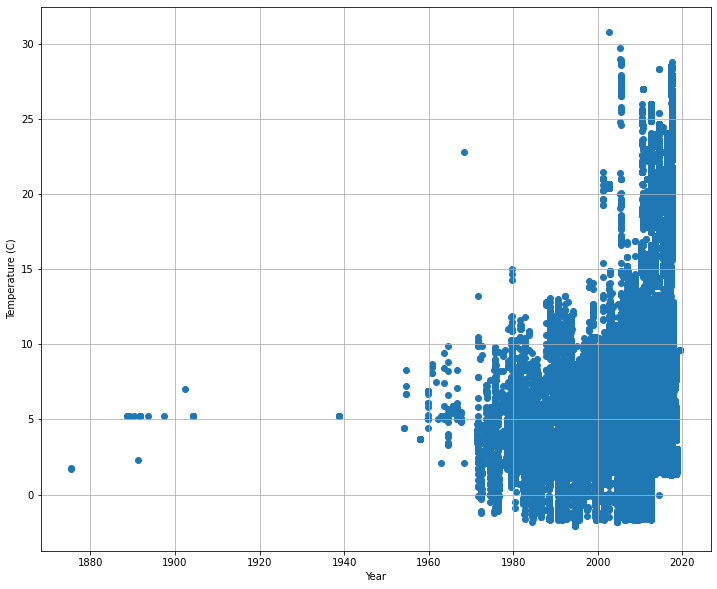

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Year')
ax.grid(True)
ax.scatter(
    x=coral_data['ObservationDate'],
    y=coral_data['Temperature']
)